In [1]:
1+3

4

In [2]:
4^2

16

In [3]:
factorial(5)

120

In [4]:
5 |> factorial

120

In [5]:
using DifferentialEquations

In [6]:
using Plots

In [7]:
f(u, p, t) = 1.01 * u
u0 = 1 / 2
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Heun(), reltol = 1e-8, abstol = 1e-8)

retcode: Success
Interpolation: 3rd order Hermite
t: 6824-element Vector{Float64}:
 0.0
 1.714901789672154e-5
 3.2775154084284215e-5
 6.600374058989014e-5
 0.00010615220965765672
 0.00016361308882304916
 0.00023262823759593871
 0.00031678735995926076
 0.0004128953846508947
 0.0005211709128139043
 ⋮
 0.9990483788250748
 0.9991779893609334
 0.9993075963208935
 0.9994371997050537
 0.9995667995135128
 0.9996963957463693
 0.9998259884037218
 0.9999555774856692
 1.0
u: 6824-element Vector{Float64}:
 0.5
 0.5000086603290378
 0.5000165517267654
 0.5000333330000335
 0.5000536097396664
 0.500082631437032
 0.5001174910619194
 0.5001600032122417
 0.5002085556524362
 0.5002632605925023
 ⋮
 1.3714816863403496
 1.3716612341526306
 1.371840800515832
 1.3720203854312218
 1.3721999889000682
 1.3723796109236395
 1.3725592515032035
 1.3727389106400285
 1.3728005023407766

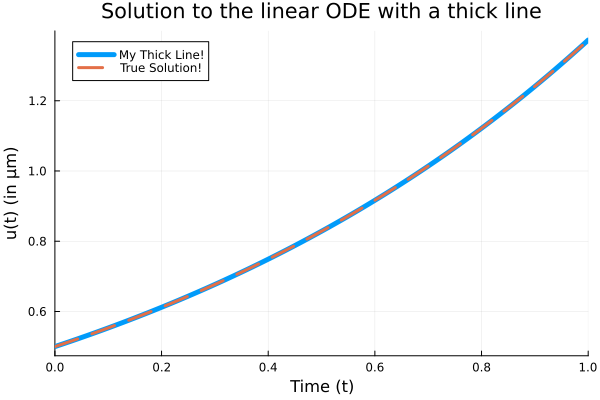

In [8]:
plot(sol, linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "My Thick Line!") # legend=false
plot!(sol.t, t -> 0.5 * exp(1.01t), lw = 3, ls = :dash, label = "True Solution!")

In [32]:
f(u, p, t) = (-0.2 + 2*pi*1im) * u
u0 = 1 / 2 + 0im
tspan = (0.0, 5.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Heun(), reltol = 1e-3, abstol = 1e-3)

retcode: Success
Interpolation: 3rd order Hermite
t: 493-element Vector{Float64}:
 0.0
 0.0008712862376853592
 0.0016651981909846817
 0.003353508361466209
 0.005393463508260518
 0.008313328957529151
 0.011820641385270213
 0.016098216975077576
 0.02098398099158763
 0.02648955950813137
 ⋮
 4.901737681087666
 4.914297377057139
 4.926870318689441
 4.93945654081446
 4.952056076672315
 4.964668959578947
 4.977295222089246
 4.989934898507683
 5.0
u: 493-element Vector{ComplexF64}:
                 0.5 + 0.0im
  0.4999053865590256 + 0.0027367494619402874im
 0.49980614754298075 + 0.0052295609478211075im
  0.4995538328774343 + 0.010527637372386845im
  0.4991741440252352 + 0.016922855325308014im
  0.4984884330743535 + 0.026062656482052714im
 0.49744390110941106 + 0.03701558315196579im
   0.495844835681098 + 0.05032882228299572im
 0.49358342726141446 + 0.06546260368110614im
 0.49048288552519526 + 0.08240691216561041im
                     ⋮
 0.15516800560121835 - 0.1050837905414853im
 0.1625674092

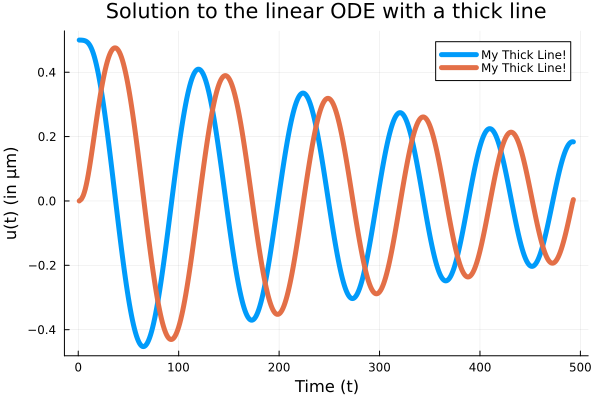

In [33]:
plot(real(sol.u), linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "My Thick Line!") # legend=false
plot!(imag(sol.u), linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "My Thick Line!") # legend=false

In [11]:
struct SpikeTrain
    times::Array{<:Real,1}
    indices::Array{<:Int,1}
    shape::Tuple
    offset::Real
end

In [12]:
times = collect(0:0.01:1.0)
n = length(times)
indices = collect(1:n)

101-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
  93
  94
  95
  96
  97
  98
  99
 100
 101

In [13]:
train = SpikeTrain(times, indices, (1,n), 0.0) 

SpikeTrain([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  92, 93, 94, 95, 96, 97, 98, 99, 100, 101], (1, 101), 0.0)

In [14]:
zeros(train.shape)

1×101 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [44]:
function spike_current(train::SpikeTrain, t::Real, t_window::Real = 0.03)
    current = zeros(ComplexF32, train.shape)

    times = train.times
    relative_time = abs.(times .- t)
    active = relative_time .< t_window
    active_inds = train.indices[active]
    current[active_inds] .+= (1.0 + 0im)
    return current
end

spike_current (generic function with 2 methods)

In [45]:
@time spike_current(train, 0.5)

  0.029174 seconds (157.13 k allocations: 8.252 MiB, 97.46% compilation time)


1×101 Matrix{ComplexF32}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im

In [46]:
spike_current(train, 0.5) |> sum

5.0f0 + 0.0f0im

In [49]:
f(u, p, t) = (-0.2 + 2*pi*1im) .* u .+ spike_current(train, t)
u0 = zeros(ComplexF32, train.shape)
tspan = (0.0, 5.0)
prob = ODEProblem(f, u0, tspan)
sol2 = solve(prob, Heun(), adaptive = false, dt = 0.01)

retcode: Success
Interpolation: 3rd order Hermite
t: 501-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.060000000000000005
 0.07
 0.08
 0.09
 ⋮
 4.9199999999999395
 4.929999999999939
 4.939999999999939
 4.949999999999939
 4.959999999999939
 4.9699999999999385
 4.979999999999938
 4.989999999999938
 5.0
u: 501-element Vector{Matrix{ComplexF32}}:
 [0.0f0 + 0.0f0im 0.0f0 + 0.0f0im … 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.00999f0 + 0.00031415926f0im 0.00999f0 + 0.00031415926f0im … 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.019920621f0 + 0.0012535056f0im 0.019920621f0 + 0.0012535056f0im … 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.024752896f0 + 0.0028118324f0im 0.029752895f0 + 0.0028118324f0im … 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.02447826f0 + 0.004352824f0im 0.0344484f0 + 0.004980514f0im … 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.024108086f0 + 0.005870473f0im 0.033999264f0 + 0.0071208593f0im … 0.0f0 + 0.0f0im 0.0f0 + 0.0f0im]
 [0.023644214f0 + 0.007358882f0im 0.0334177f0 + 0.009224541f0im … 

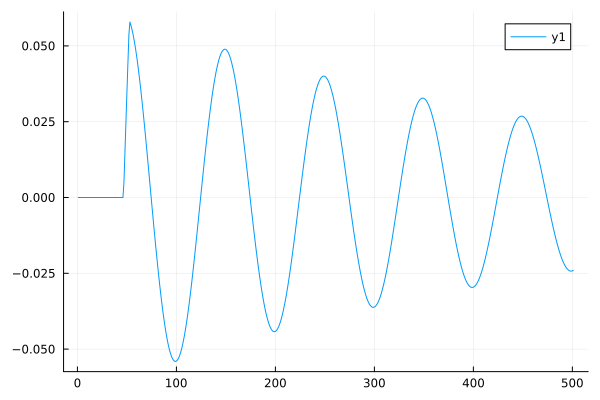

In [72]:
plot(real([x[1,50] for x in sol2.u]))

In [73]:
getneuron = i -> [x[1,i] for x in sol2.u]

#29 (generic function with 1 method)

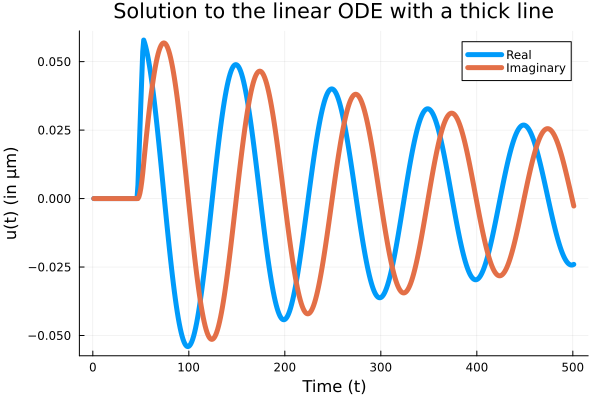

In [74]:
plot(real(getneuron(50)), linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "Real") # legend=false
plot!(imag(getneuron(50)), linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "Imaginary") # legend=false

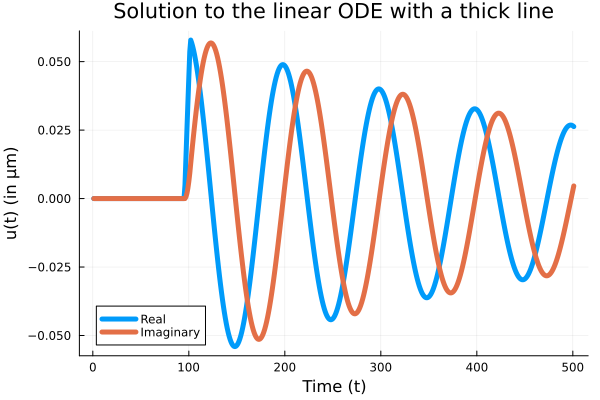

In [75]:
plot(real(getneuron(99)), linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "Real") # legend=false
plot!(imag(getneuron(99)), linewidth = 5, title = "Solution to the linear ODE with a thick line",
     xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "Imaginary") # legend=false